In [109]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


In [110]:
gr=1.0/5.0
gp=1.0/30.0
kr=1.0/1.0
kp=50.0
k=100

tiempo=0.05/gp
numero_de_celulas=10

p=zeros((numero_de_celulas,tiempo*10000))
r=zeros((numero_de_celulas,tiempo*10000))
tau=zeros((numero_de_celulas,tiempo*10000))

In [111]:
tamano=10000.0
for j in range (0,numero_de_celulas):
    print j
    p0=zeros(tiempo*10000)
    r0=zeros(tiempo*10000)
    r0[0]=100.0
    p0[0]=100.0
    t=0.0
    i=0.0
    while t<tiempo: 
        aleatorio=random.random()  
        a=r0[i]
        b=p0[i]  
        kt=kp*a+kr/(1+(b/k)**-2)+gp*b+gr*a
        kpkt=kp*a/kt
        gpkt=gp*b/kt
        grkt=gr*a/kt
        krkt=(kr/(1+(b/k)**-2))/kt
        if(aleatorio>=0)&(aleatorio<krkt):
            r0[i+1]=(a+1.0)
            p0[i+1]=(b)      
        elif(aleatorio<kpkt+krkt)&(aleatorio>=krkt) &(a!=0) :
            p0[i+1]=(b+1.0) 
            r0[i+1]=(a)
        elif(aleatorio<kpkt+krkt+gpkt)&(aleatorio>=kpkt+krkt) & (b!=0):
            p0[i+1]=(b-1.0) 
            r0[i+1]=(a)
        elif(aleatorio<1) & (aleatorio>=kpkt+krkt+gpkt) & (a!=0):
            r0[i+1]=(a-1.0)
            p0[i+1]=(b)
        c=random.exponential(1.0/kt)
        t=t+sum(c)
        tau[j][i+1]=t
        i=1+i
    if(tamano>i):
        tamano=i
    p[j]=p0
    r[j]=r0


0
1
2
3
4
5
6
7
8
9


In [112]:
a=tamano
pfinal=zeros((numero_de_celulas,a+1))
rfinal=zeros((numero_de_celulas,a+1))
tau_final=zeros((numero_de_celulas,a+1))
for i in range (0,numero_de_celulas):
    pfinal[i]=(p[i])[0:a+1]
    rfinal[i]=(r[i])[0:a+1]
    tau_final[i]=(tau[i])[0:a+1]

In [113]:
particion=tamano*10
dt=tamano/particion
print dt
p2=zeros((numero_de_celulas,particion))
r2=zeros((numero_de_celulas,particion))

for i in range (0,numero_de_celulas):
    for j in range (0, int(particion)):
        indice = (abs(tau_final[i]-j*dt)).argmin()
        p2[i][j]=pfinal[i][indice]
        r2[i][j]=rfinal[i][indice]
        
            

0.1


In [114]:
a=0
b=0
for i in range(0, len(p2)):
    a=a+p2[i]
    b=b+r2[i]
a=a/len(p2)
b=b/len(r2)

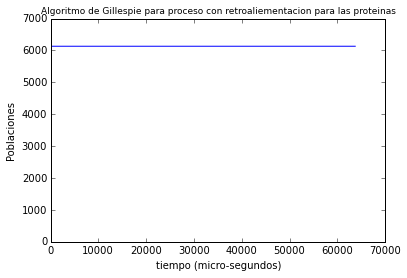

In [115]:
fig=plot(a)
title("Algoritmo de Gillespie para proceso con retroaliementacion para las proteinas",size=9)
ylabel('Poblaciones')
xlabel('tiempo (micro-segundos)')
plt.savefig('Simulacion gillespie retroalimentada proteina.pdf',dpi=350)

[ 100.    97.6   96.  ...,   75.7   75.7   75.7]


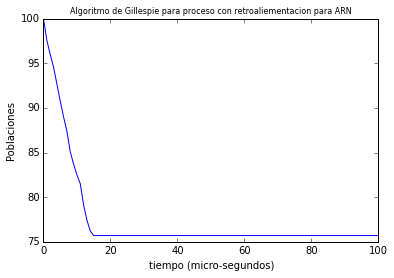

In [120]:
ylabel('Poblaciones')
xlabel('tiempo (micro-segundos)')
plot(b)
print b
xlim(0,100)
title("Algoritmo de Gillespie para proceso con retroaliementacion para ARN",size=8)
plt.savefig('Simulacion gillespie retroalimentada ARN.pdf',dpi=350)

In [117]:
c=len(a)-1
distribucionp=empty(0)
distribucionr=empty(0)

for i in range (0,10):
    distribucionp=append(distribucionp,[p2[i][c]])
    distribucionr=append(distribucionr,[r2[i][c]])

    

Abajo de cada grafica se distribucion de encuentra primero el ruido y luego el promedio

0.00555157228441
6133.1


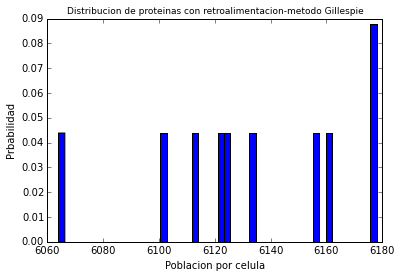

In [118]:
fig=count, bins, ignored = plt.hist(distribucionp, 50,normed=True)
title("Distribucion de proteinas con retroalimentacion-metodo Gillespie",size=9)
ylabel('Prbabilidad')
xlabel('Poblacion por celula')
plt.savefig('Distribucion de proteinas retroalimetada.pdf',dpi=350)
r= std(distribucionp)
l= mean(distribucionp)
ruido=r/l
print ruido
print l

0.0409511228534
75.7


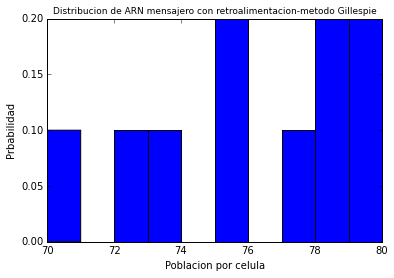

In [119]:
fig=count, bins, ignored = plt.hist(distribucionr, 10,normed=True)
title("Distribucion de ARN mensajero con retroalimentacion-metodo Gillespie",size=9)
ylabel('Prbabilidad')
xlabel('Poblacion por celula')
plt.savefig('Distribucion de ARN mensajero retroalimetada.pdf',dpi=350)
c= std(distribucionr)
d = mean(distribucionr)
ruido=c/d
print ruido
print d